# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [179]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [185]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | xinqing
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | the pas
Processing Record 8 of Set 1 | mbaiki
Processing Record 9 of Set 1 | severo-yeniseyskiy
Processing Record 10 of Set 1 | bella vista
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | zabaykal'sk
Processing Record 16 of Set 1 | nordborg
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | muisne
Processing Record 19 of Set 1 | didwana
Processing Record 20 of Set 1 | freetown
Processing Record 21 of Set 1 | puerto san carlos
City not found. Skipping...
Processi

In [195]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [197]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,19.71,95,0,4.12,US,1738867846
1,ushuaia,-54.8000,-68.3000,8.81,71,75,12.86,AR,1738867847
2,xinqing,48.2333,129.5000,-17.18,98,100,1.53,CN,1738867849
3,edinburgh of the seven seas,-37.0676,-12.3116,17.03,91,47,9.92,SH,1738867850
4,port-aux-francais,-49.3500,70.2167,6.46,84,100,8.78,TF,1738867851


In [199]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [201]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,19.71,95,0,4.12,US,1738867846
1,ushuaia,-54.8000,-68.3000,8.81,71,75,12.86,AR,1738867847
2,xinqing,48.2333,129.5000,-17.18,98,100,1.53,CN,1738867849
3,edinburgh of the seven seas,-37.0676,-12.3116,17.03,91,47,9.92,SH,1738867850
4,port-aux-francais,-49.3500,70.2167,6.46,84,100,8.78,TF,1738867851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

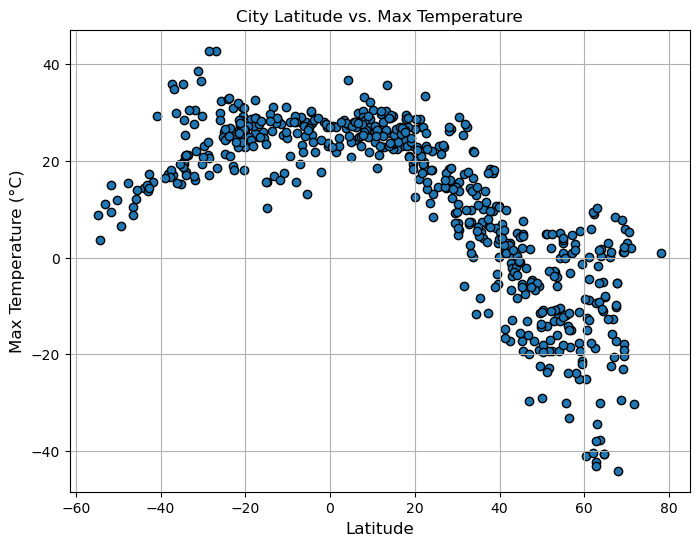

In [204]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

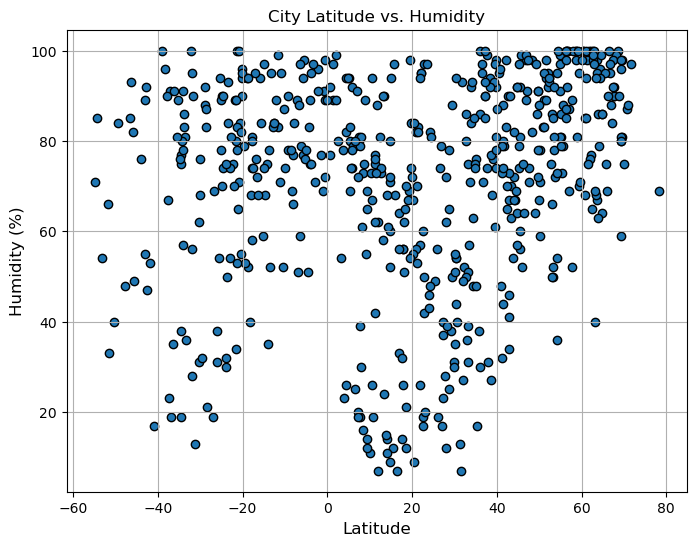

In [207]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

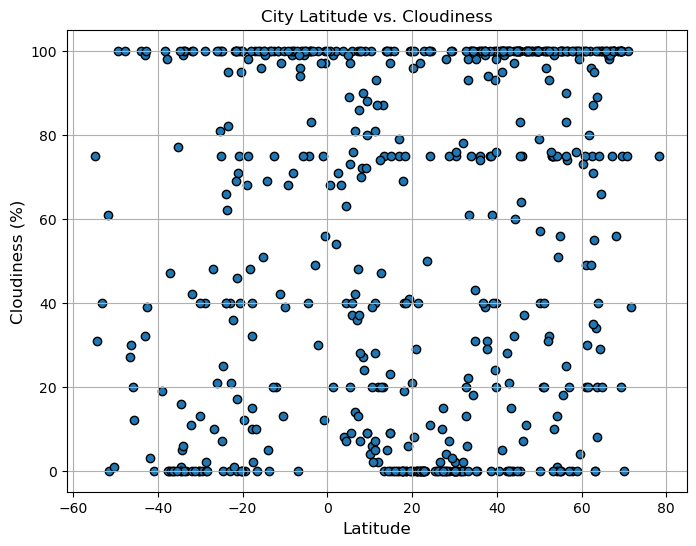

In [210]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

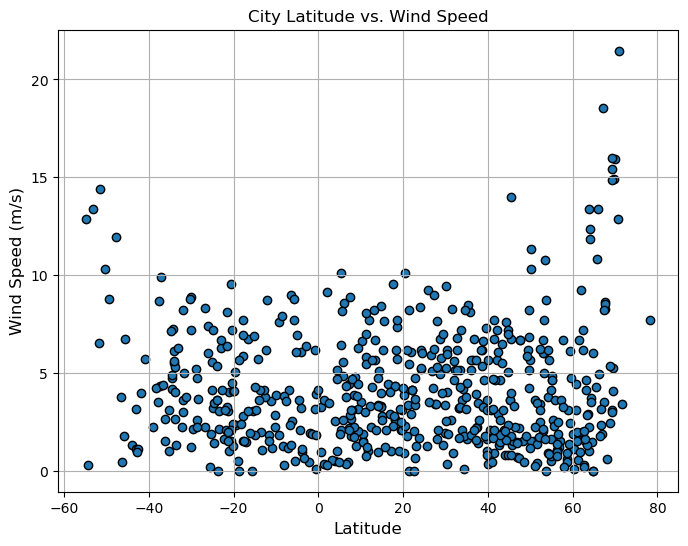

In [213]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [216]:
# Define a function to create Linear Regression plots

In [218]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,19.71,95,0,4.12,US,1738867846
2,xinqing,48.2333,129.5000,-17.18,98,100,1.53,CN,1738867849
6,the pas,53.8251,-101.2541,-11.99,72,75,8.75,CA,1738867827
7,mbaiki,3.8678,17.9892,26.72,23,8,0.49,CF,1738867854
8,severo-yeniseyskiy,60.3725,93.0408,-25.17,100,100,1.10,RU,1738867855


In [220]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,8.81,71,75,12.86,AR,1738867847
3,edinburgh of the seven seas,-37.0676,-12.3116,17.03,91,47,9.92,SH,1738867850
4,port-aux-francais,-49.3500,70.2167,6.46,84,100,8.78,TF,1738867851
5,puerto natales,-51.7236,-72.4875,9.43,66,61,6.53,CL,1738867852
12,adamstown,-25.0660,-130.1015,24.94,78,100,5.57,PN,1738867637


###  Temperature vs. Latitude Linear Regression Plot

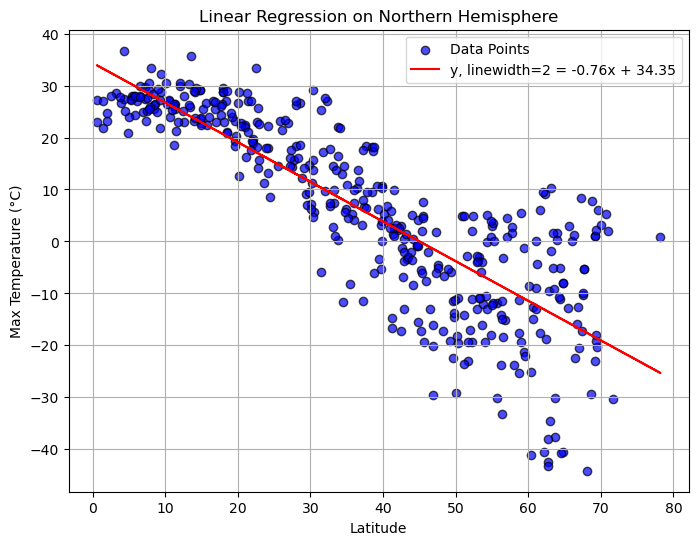

In [223]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Linear Regression on Northern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Regression_temp_lat.png")

# Show plot
plt.show()

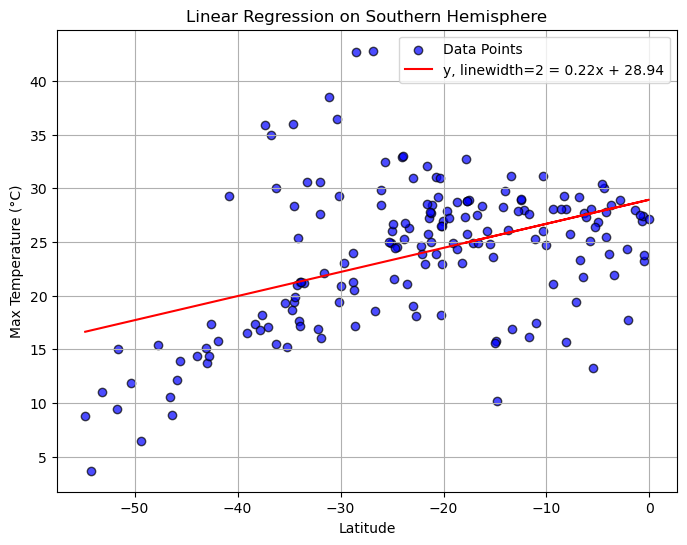

In [225]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Linear Regression on Southern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Regression_temp_lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** This analysis investigates the relationship between latitude and maximum temperature in the Northern and Southern Hemisphere using a linear regression. The goal is to explore how temperature changes at varying latitudes in each hemisphere. The Northern Hemisphere plot reveals a strong negative correlation between latitude and maximum temperature, as you move north, the maximum temperature tends to decrease. In the southern hemisphere, there is a positive correlation between latitude and maximum temperature, as the latitude increases, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

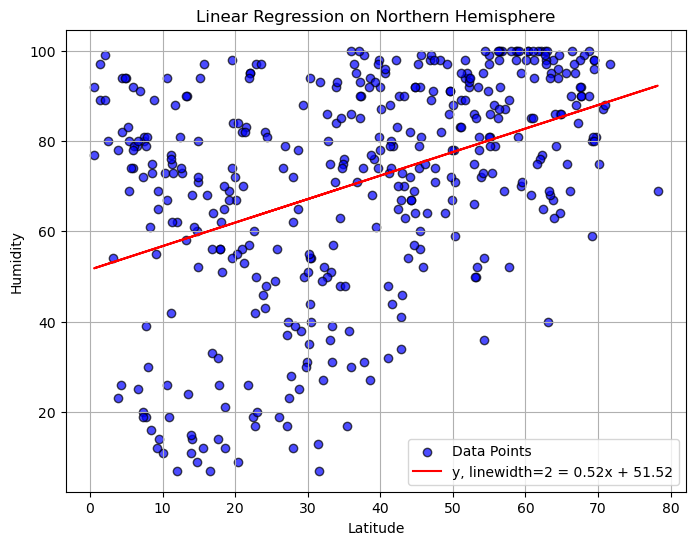

In [229]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression on Northern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Regression_hum_lat.png")

# Show plot
plt.show()

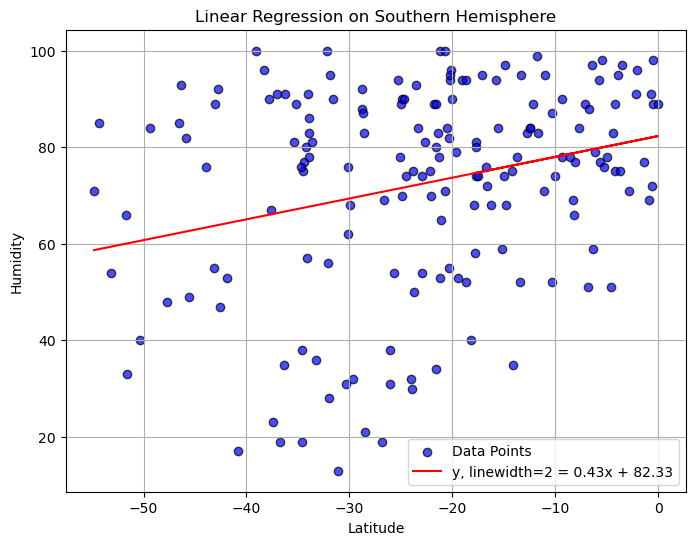

In [231]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression on Southern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Regression_hum_lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** This analysis investigates the relationship between latitude and humidity in the Northern and Southern Hemisphere using a linear regression. The goal is to explore how humidity changes at varying latitudes in each hemisphere. In the northern hemisphere, the regression line is going up, indicating a positive correlation between latitude and humidity, as you move north (increasing latitude), it tends to increase. In the southern hemisphere, the regression line is going up, but the relationship is almost straight, there is a weak positive correlation between latitude and humidity, as latitude increases, it slightly increases.

### Cloudiness vs. Latitude Linear Regression Plot

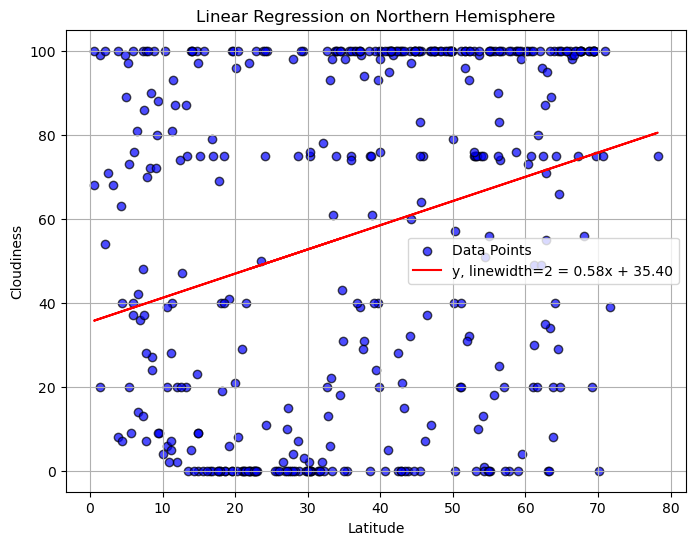

In [235]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression on Northern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Regression_cloud_lat.png")

# Show plot
plt.show()

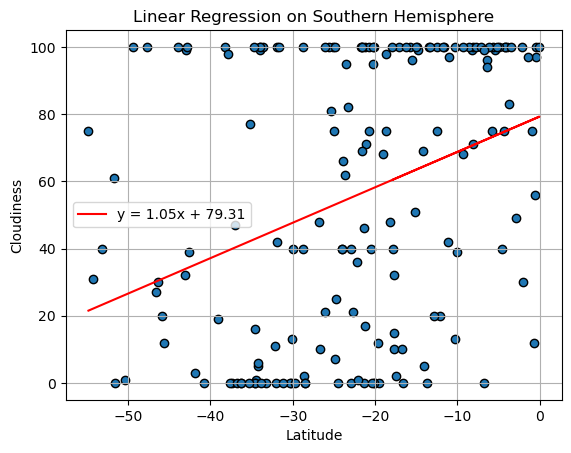

In [237]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = [slope * x + intercept for x in x_values]

# Create Scatter Plot
plt.scatter(x_values, y_values, edgecolors="black")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression on Southern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Regression_cloud_lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** This analysis investigates the relationship between latitude and cloudiness in the Northern and Southern Hemispheres using linear regression. The goal is to explore how cloudiness changes at varying latitudes in each hemisphere. In both hemispheres, the regression lines are going upward, showing a positive correlation between latitude and cloudiness. The data points are scattered all over the plot, meaning that the cloudiness values vary greatly at all latitudes. It indicates that cloudiness is not linked to latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

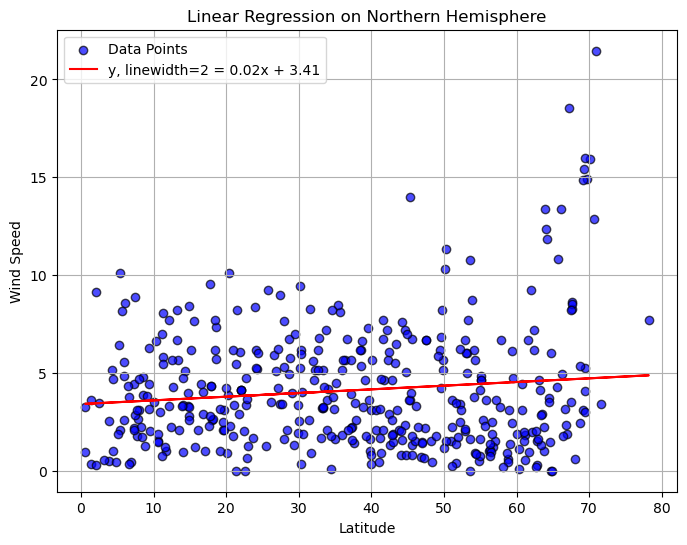

In [241]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = np.polyval([slope, intercept], x_values)

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolors="blue", edgecolors="black", alpha=0.7, label="Data Points")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression on Northern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Regression_wind_lat.png")

# Show plot
plt.show()

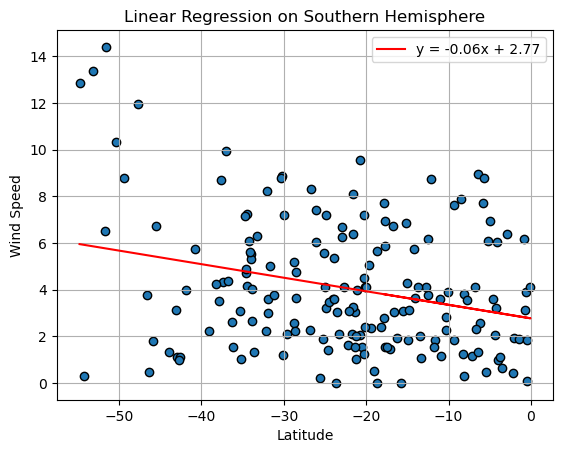

In [243]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute Regression Line
regression_values = [slope * x + intercept for x in x_values]

# Create Scatter Plot
plt.scatter(x_values, y_values, edgecolors="black")

# Plot Regression Line
plt.plot(x_values, regression_values, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression on Southern Hemisphere")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Regression_wind_lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** This analysis investigates the relationship between latitude and wind speed in the Northern and Southern Hemisphere using a linear regression. The goal is to explore how wind speed changes at varying latitudes in each hemisphere. In the northern hemisphere, the regression line is going upward, indicating a positive correlation between latitude and wind speed. However, the data points are mostly concentrated below 10km/h wind speed and suggest that it is low across most latitudes in the northern hemisphere. In the southern hemisphere, the regression line is going downward, showing a negative correlation between latitude and wind speed. The data points are spread across a wide range, but are mostly below 10km/h wind speed, especially in latitude below -40. This indicates that wind speed tends to be lower at higher latitudes in the southern hemisphere.